<a href="https://colab.research.google.com/github/JLmm123/deep_learning/blob/main/Milestone_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sklearn and Pandas Setup
import json
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from wordcloud import WordCloud
from sklearn.metrics import classification_report

if not os.path.exists('./data'):
    os.mkdir('./data')

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [ ]:
if not os.path.exists('./data/IMDB Dataset.csv.zip'):
    gdown.download(id='1q1JkdXgCELu2aIHpxmSwCzYYYU7B-Phd', output='./data/IMDB Dataset.csv.zip')

!yes n | unzip './data/IMDB Dataset.csv.zip' -d './data/'

nlp_df = pd.read_csv('./data/IMDB Dataset.csv')

nlp_df

Downloading...
From: https://drive.google.com/uc?id=1q1JkdXgCELu2aIHpxmSwCzYYYU7B-Phd
To: /content/data/IMDB Dataset.csv.zip
100%|██████████| 27.0M/27.0M [00:00<00:00, 94.9MB/s]


Archive:  ./data/IMDB Dataset.csv.zip
  inflating: ./data/IMDB Dataset.csv  


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from bs4 import BeautifulSoup
def remove_html_tags(s):
  soup = BeautifulSoup(s, "html.parser")
  return soup.get_text() if s else None

nlp_df['review'] = nlp_df['review'].apply(lambda x: remove_html_tags(x))
nlp_df


<ipython-input-4-7ddceb15d2e0>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(s, "html.parser")


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def get_lemmatized_tokens(text):
    tokens = word_tokenize(text)
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in tokens
                      if len(word) > 2 and word.isalpha()
                      and not word.lower() in stop_words]
    return filtered_words

# tokenize each comment
lemmatized_tokens = list(map(get_lemmatized_tokens, nlp_df['review'].values))
print(lemmatized_tokens[: 2])


[['one', 'reviewer', 'mentioned', 'watching', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'city', 'home', 'many', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'would', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'mess', 'around', 'first', 'episode', 'ever',

In [ ]:
lemmatized_reviews = list(map(' '.join, lemmatized_tokens))
lemmatized_reviews[: 2]

['one reviewer mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use called nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance mess around first episode ever saw struck nasty surreal could say ready watched developed taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching may become comfortable

In [ ]:
from gensim.corpora.dictionary import Dictionary
from sklearn import naive_bayes as nb
from sklearn.model_selection import train_test_split


cls2idx = {'negative': -1,
           'positive': 1}

y = [cls2idx[cls] for cls in nlp_df['sentiment'].values]

X_train, X_test, y_train, y_test = train_test_split(lemmatized_tokens, y,
                                                    test_size=0.3, random_state=42)


In [ ]:
dictionary = Dictionary(X_train)
dictionary.filter_extremes(no_below=20, no_above=0.7, keep_n=2500)

train_corpus = list(map(dictionary.doc2bow, X_train))
test_corpus = list(map(dictionary.doc2bow, X_test))
len(dictionary)

2500

In [ ]:
np.unique(y, return_counts=True)


(array([-1,  1]), array([25000, 25000]))

In [ ]:
from gensim.matutils import corpus2csc, corpus2dense

train_sparse_matrix = corpus2csc(train_corpus).T
test_sparse_matrix = corpus2csc(test_corpus).T
train_sparse_matrix, test_sparse_matrix

(<35000x2500 sparse matrix of type '<class 'numpy.float64'>'
 	with 2344389 stored elements in Compressed Sparse Row format>,
 <15000x2500 sparse matrix of type '<class 'numpy.float64'>'
 	with 1008516 stored elements in Compressed Sparse Row format>)

In [ ]:
model = nb.MultinomialNB()

model.fit(train_sparse_matrix, y_train)
y_pred = model.predict(test_sparse_matrix)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      7411
           1       0.85      0.85      0.85      7589

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



In [ ]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(max_iter=250, random_state=42)

lr_clf.fit(train_sparse_matrix, y_train)
y_pred = lr_clf.predict(test_sparse_matrix)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.87      0.87      0.87      7411
           1       0.87      0.88      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
def get_c():
    c = 0.001
    while c <= 100:
        yield c
        c *= 10


c = get_c()
a = []
for c_ in c:
    lr_clf = LogisticRegression(max_iter=250, random_state=42, C=c_)
    lr_clf.fit(train_sparse_matrix, y_train)
    y_pred = lr_clf.predict(test_sparse_matrix)
    report = classification_report(y_test, y_pred, output_dict=True)
    a.append(report['accuracy'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(train_sparse_matrix, y_train)

y_pred = rf_clf.predict(test_sparse_matrix)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.85      0.84      7411
           1       0.85      0.84      0.84      7589

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



<generator object get_c at 0x7cbce6598040>

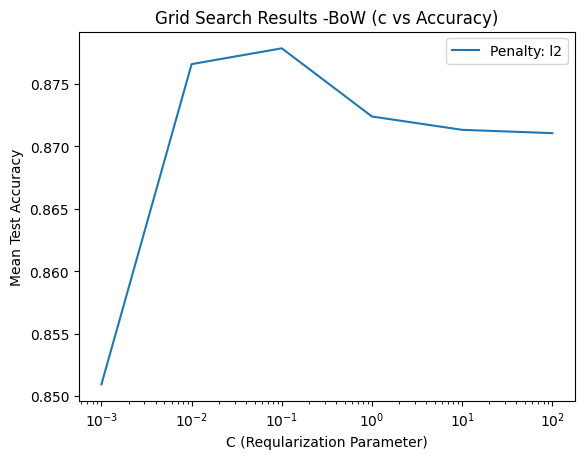

In [ ]:
plt.plot(list(get_c()), a)
plt.title('Grid Search Results -BoW (c vs Accuracy)')
plt.legend(['Penalty: l2'])
plt.xlabel('C (Reqularization Parameter)')
plt.ylabel('Mean Test Accuracy')
plt.xscale('log')

In [ ]:
from nltk import bigrams
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(text):
  # Convert the bigrams back to text for TF-IDF analysis
  #bi_grams_text = [' '.join([' '.join(gram) for gram in grams]) for grams in bigrams]
  # Compute TF-IDF scores
  #print (bi_grams_text)
  vectorizer = TfidfVectorizer(ngram_range = (2, 2))
  X = vectorizer.fit_transform(text)

  # Get feature names (bigrams)
  feature_names = vectorizer.get_feature_names_out()
  print(feature_names)
  # Compute TF-IDF scores for each bigram
  #tfidf_scores = X.toarray()
  sums = X.sum(axis=0)
  data = []
  for col, term in enumerate(feature_names):
    data.append((term, sums[0, col]))
  ranking = pd.DataFrame(data, columns=['term', 'rank'])
  top_500_tfidf = ranking.sort_values('rank', ascending=False)[:500]

  return top_500_tfidf

top_500_tfidf = tfidf(lemmatized_reviews)
top_500_tfidf


['aaa alcoholic' 'aaa ball' 'aaa even' ... 'četvorka another' 'יגאל כרמון'
 'כרמון president']


,term,rank
797863,ever seen,119.721338
1435614,look like,104.513067
1603637,movie ever,103.340889
2288166,special effect,96.545212
1711084,one best,86.445948
...,...,...
2439773,ten year,15.858268
676011,done better,15.841191
1011220,get movie,15.798961
902552,film still,15.775850


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(lemmatized_reviews, y,
                                                    test_size=0.3, random_state=42)

model = make_pipeline(TfidfVectorizer(ngram_range=(1, 2)), LogisticRegression(max_iter=250, random_state=42))
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('logisticregression',
                 LogisticRegression(max_iter=250, random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.90      0.87      0.88      7411
           1       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [ ]:
model = make_pipeline(TfidfVectorizer(ngram_range=(1, 1)), LogisticRegression(max_iter=250, random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.90      0.88      0.89      7411
           1       0.88      0.91      0.90      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [ ]:
model = make_pipeline(TfidfVectorizer(ngram_range=(2, 2)), LogisticRegression(max_iter=250, random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.87      0.84      0.86      7411
           1       0.85      0.88      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [ ]:
def tfidf(text, ngram=1):
  # Convert the bigrams back to text for TF-IDF analysis
  #bi_grams_text = [' '.join([' '.join(gram) for gram in grams]) for grams in bigrams]
  # Compute TF-IDF scores
  #print (bi_grams_text)
  vectorizer = TfidfVectorizer(ngram_range=(ngram, ngram))
  X = vectorizer.fit_transform(text)

  # Get feature names (bigrams)
  feature_names = vectorizer.get_feature_names_out()
  print(feature_names)
  # Compute TF-IDF scores for each bigram
  #tfidf_scores = X.toarray()
  sums = X.sum(axis=0)
  data = []
  for col, term in enumerate(feature_names):
    data.append((term, sums[0, col]))
  ranking = pd.DataFrame(data, columns=['term', 'rank'])
  top_500_tfidf = ranking.sort_values('rank', ascending=False)[:500]

  return top_500_tfidf

tfidf(lemmatized_reviews)

['aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' 'aaaaaaaargh' ... 'četvorka' 'יגאל'
 'כרמון']


,term,rank
52040,movie,2673.964268
27957,film,2204.429539
55542,one,1325.814309
45345,like,1140.154771
32271,good,998.435767
...,...,...
37219,husband,125.123745
54260,none,125.120136
7467,beyond,124.915284
76221,surprise,124.856341


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(lemmatized_reviews)
X

<50000x2773750 sparse matrix of type '<class 'numpy.float64'>'
	with 5433427 stored elements in Compressed Sparse Row format>

In [ ]:
from nltk import bigrams
bi_gram = [list(bigrams(token)) for token in lemmatized_tokens]

In [ ]:
a, b = zip(*bi_gram[0])

In [ ]:
a[: 3], b[: 3]

(('one', 'reviewer', 'mentioned'), ('reviewer', 'mentioned', 'watching'))